In [7]:
from keras.applications.vgg16 import VGG16
from keras.layers import Input,Flatten,Dense
from keras.models import Model

from keras.models import Sequential
from keras.layers import Dropout, Flatten, Convolution2D, MaxPooling2D, ZeroPadding2D, Dense, Activation
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras import backend as K

import numpy as np
import pandas as pd
import cv2
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle 
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.layers import GlobalAveragePooling2D

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

Using TensorFlow backend.


In [8]:
path_train = "./input/train/"

classes = ['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']

X = []
Y = []

filenames = []
sizes = []

for c in classes:
    class_path = path_train+c
    if(os.path.exists(class_path)):
        image_ids = os.listdir(class_path)
        cnt=0
        for img_id in image_ids:
            filenames.append(img_id)
            image_path = class_path+"/"+img_id
            img = cv2.imread(image_path)
            sizes.append(img.shape[:2])
            img = cv2.resize(img,(224,224))
            X.append(img)
            Y.append(c)
            cnt+=1
    print(c+" Done "+str(cnt))




ALB Done 1719
BET Done 200
DOL Done 117
LAG Done 67
NoF Done 465
OTHER Done 299
SHARK Done 176
YFT Done 734


In [9]:
filenames[-10:]

['img_07775.jpg',
 'img_07782.jpg',
 'img_07828.jpg',
 'img_07849.jpg',
 'img_07852.jpg',
 'img_07853.jpg',
 'img_07854.jpg',
 'img_07891.jpg',
 'img_07901.jpg',
 'img_07911.jpg']

In [10]:
sizes[:10]

[(720, 1280),
 (720, 1280),
 (974, 1280),
 (750, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (670, 1192),
 (750, 1280),
 (720, 1280)]

In [11]:
print(len(X))
#print(len(y))
X = np.array(X)
y = np.array(Y)
print(X.shape)
print(y.shape)

3777
(3777, 224, 224, 3)
(3777,)


In [524]:
# data=[]
# for x in X_np:
#     data.append([x.shape[0],x.shape[1]]) 
# data[:10]
# cols = ['Rows','Cols']
# df = pd.DataFrame(data,columns=cols)
# df.head()

In [12]:
zipped_data = zip(X,y)
d=list(zipped_data)
shuf_data=shuffle(d,random_state=0)

['img_02273.jpg',
 'img_07609.jpg',
 'img_06366.jpg',
 'img_03296.jpg',
 'img_04588.jpg',
 'img_06304.jpg',
 'img_04056.jpg',
 'img_07464.jpg',
 'img_02840.jpg',
 'img_07771.jpg']

(750, 1280)

In [15]:
i=0
X=[]
y=[]
for data in shuf_data:
    i+=1
    X.append(data[0])
    y.append(data[1])
    #print(str(data[0])+" "+data[1]) 

img_05970.jpg


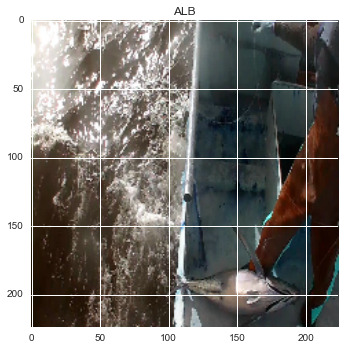

In [16]:
plt.imshow(X[20])
plt.title(y[20])
print(sh_filename[20])

In [17]:
encoded = LabelEncoder().fit_transform(y)
y = np_utils.to_categorical(encoded)
y.shape



In [333]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y,test_size=0.25, stratify=y, random_state=0)
X_train1 = np.array(X_train1)
X_test1 = np.array(X_test1)
X_train1.shape
X_test1.shape


(945, 224, 224, 3)

In [372]:
# sh_filename = shuffle(filenames,random_state=0)
# sh_filename[:10]
filenames_train,filenames_test,size_train,size_test = train_test_split(filenames, sizes,test_size=0.25, random_state=0)

In [373]:
filenames_train[:10]

['img_03932.jpg',
 'img_06803.jpg',
 'img_06991.jpg',
 'img_03586.jpg',
 'img_05495.jpg',
 'img_07377.jpg',
 'img_04018.jpg',
 'img_05029.jpg',
 'img_03029.jpg',
 'img_06554.jpg']

In [349]:
sh_size = shuffle(sizes,random_state=0)
sh_size[2]

(720, 1280)

In [339]:
y_test1.shape
#plt.imshow(X_train1[2])

(945, 8)

(720, 1280)


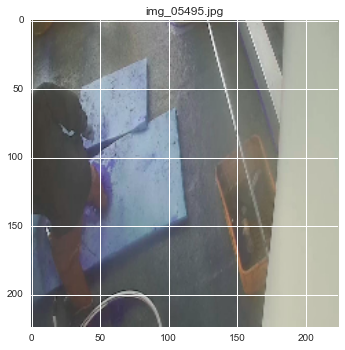

In [385]:
ids =4
plt.imshow(X_train1[ids])
plt.title(filenames_train[ids])
print(size_train[ids])

In [ ]:
X_train = np.array(X[:3000])
y_train = np.array(y[:3000])
X_test = np.array(X[3000:])
y_test = np.array(y[3000:])

In [18]:
y.shape

(3777, 8)

In [19]:
y_train.shape

(3000, 8)

In [360]:
#base_model = VGG16(include_top=False, weights='imagenet', input_tensor=Input((224,224,3)))
#base_model.summary()


In [21]:
def split_at(model, layer_type):
    layers = model.layers
    layer_idx = [index for index,layer in enumerate(layers)
                 if type(layer) is layer_type][-1]
    return layers[:layer_idx+1], layers[layer_idx+1:]

conv_layers,fc_layers = split_at(base_model, Convolution2D)

In [22]:
conv_model = Sequential(conv_layers)

In [63]:
#conv_model.summary()

In [341]:
conv_train_f = conv_model.predict(X_train1,verbose=1)

2832/2832 [==============================] - 7057s   


In [342]:
conv_test_f = conv_model.predict(X_test1,verbose=1)

945/945 [==============================] - 2095s   


In [343]:
np.save('trainconv2_stratified.npy', conv_train_f)
np.save('testconv2_stratified.npy', conv_test_f)

In [168]:
# b= np.load('trainconv.npy')
# b.shape

In [24]:
# conv_train_f = np.load('trainconv2_shuffle.npy')
# conv_test_f = np.load('testconv2_shuffle.npy')

In [344]:
conv_train_f.shape

(2832, 14, 14, 512)

In [345]:
conv_train_f.shape

(2832, 14, 14, 512)

In [171]:
# for layer in base_model.layers:
#     layer.trainable = False
# x = base_model.output
# x = Flatten(name='flatten')(x)
# x = Dense(512, activation='relu', name='fc1')(x)
# x= Dropout(0.5)(x)
# x=Dense(512, activation='relu')(x)
# x=BatchNormalization()(x)
# x=Dropout(0.5)(x)
# x=Dense(8, activation='softmax')(x)

# model = Model(input=base_model.input, output=x)

# model.compile(optimizer='Adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# model.optimizer.lr = 10e-4

In [377]:
model = Sequential()
model.add(Flatten(input_shape=(14,14,512)))
model.add(Dense(200,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Dense(100,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Dense(8,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.optimizer.lr = 10e-4

In [396]:
model.optimizer.lr = 10e-5
model.fit(conv_train_f, y_train, batch_size=64, nb_epoch=2, verbose=1, shuffle=True,validation_data=(conv_test_f,y_test))
# file_path = "best.weights.fishes.hdf5"
# checkpoint = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]
# i=0
# while(i<20):
    
#     loss=10000
#     h=model.fit(conv_train_f, y_train, batch_size=64, nb_epoch=1, verbose=1, shuffle=True,validation_data=(conv_test_f,y_test))
    
#     if(h.history["val_loss"][0]<loss):
#          print("model loss improved from {} to {}".format(h.history["val_loss"][0],loss))
#         loss=h.history["val_loss"][0]
#         model.save("./checkpoints/epoch{}.h5",i)
#     i+=1    

Train on 3000 samples, validate on 777 samples
Epoch 1/2
3000/3000 [==============================] - 35s - loss: 0.0967 - acc: 0.9743 - val_loss: 0.1240 - val_acc: 0.9743
Epoch 2/2
3000/3000 [==============================] - 44s - loss: 0.0766 - acc: 0.9813 - val_loss: 0.1150 - val_acc: 0.9743


In [1]:
import json
from pprint import pprint

In [363]:
json_classes = ['alb', 'bet', 'dol', 'lag', 'shark', 'yft']

bb_cord = {}
for cl in json_classes:
    with open('./anno/{}_labels.json'.format(cl)) as bounding:
        bb_data = json.load(bounding)
        for image in bb_data:
            area = 0
            bb_arrs = image['annotations']
            for box in bb_arrs:
                if(int(box['height'])*int(box['width'])>area):
                    area = int(box['height'])*int(box['width'])
                    bb_cord[image['filename'].split('/')[-1]] = box
                    
#bb_cord            
    

In [361]:
bb_cord['img_03296.jpg']

{'class': 'rect',
 'height': 100.11000000000018,
 'width': 219.9600000000005,
 'x': 359.55000000000075,
 'y': 415.9500000000009}

In [31]:
empty_bbox = {'height': 0., 'width': 0., 'x': 0., 'y': 0.}

In [352]:
for f in filenames:
    if f not in bb_cord.keys():
        bb_cord[f]=empty_bbox

In [353]:
file2idx = {o:i for i,o in enumerate(sh_filename)}
id2file = {i:o for i,o in enumerate(sh_filename)}

In [354]:
bb_cord['img_05970.jpg']

{'class': 'rect',
 'height': 249.00000000000142,
 'width': 572.0000000000031,
 'x': 552.0000000000031,
 'y': 499.0000000000028}

(4,)
[  31.14533333   38.493        62.92125     129.40666667]


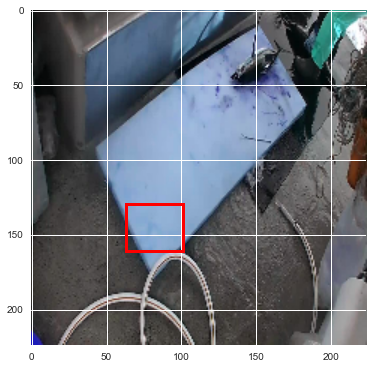

In [364]:
#bbc = array(5)

def bb_v(filename):
    bbc = []
    attr = bb_cord[filename]
    index = file2idx[filename]
    size = sh_size[index]
    conv_y = (224. / size[0])
    conv_x = (224. / size[1])
#     print(attr['x']*conv_x)
#     print(attr['y']*conv_y)
    bbc.append(attr['height']*conv_y)
    bbc.append(attr['width']*conv_x)
    bbc.append(max(attr['x']*conv_x, 0))
    bbc.append(max(attr['y']*conv_y, 0))
    return bbc
# ploting
bb = bb_v('img_03296.jpg')
bb = np.array(bb)
print(bb.shape)
print(bb)
plt.figure(figsize=(6,6))
plt.imshow(X_train1[3])
plt.gca().add_patch(plt.Rectangle((bb[2], bb[3]), bb[1], bb[0], color='red', fill=False, lw=3))

In [356]:
# trn_bbox = np.stack([bb_v(f) for f in (sh_filename[:3000])], 
#                    ).astype(np.float32)
# val_bbox = np.stack([bb_v(f) for f in (sh_filename[3000:])], 
#                    ).astype(np.float32)
trn_bbox = []
val_bbox = []
for f in sh_filename[]:
    bb=bb_v(f)
    trn_bbox.append(bb)
for f in sh_filename[3000:]:
    bb = bb_v(f)
    val_bbox.append(bb)
trn_bbox = np.array(trn_bbox)    
val_bbox = np.array(val_bbox)

In [357]:
trn_bbox[2]

array([ 0.,  0.,  0.,  0.])

[60.25462012320334, 52.500000000000036, 112.3500000000001, 120.04928131416848]


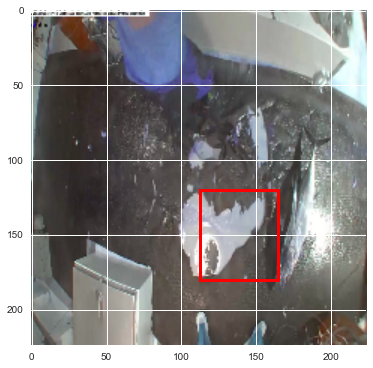

In [359]:
idx = 10
name = id2file[idx]
bb = bb_v(name)
print(bb)
plt.figure(figsize=(6,6))
plt.imshow(X_train1[idx])
plt.gca().add_patch(plt.Rectangle((bb[2], bb[3]), bb[1], bb[0], color='red', fill=False, lw=3))

In [89]:
trn_bbox[10]

array([  60.25462012,   52.5       ,  112.35      ,  120.04928131])

In [286]:

inputs = Input(shape=(14,14,512))

x = MaxPooling2D()(inputs)
x = BatchNormalization(axis=1)(x)
x = Dropout(0.15)(x)

x = Flatten()(x)
x = Dense(512,activation='relu',name='fc1')(x)
x = BatchNormalization(axis=1)(x)
x = Dropout(0.6)(x)

x = Dense(512,activation='relu',name='fc2')(x)
x = BatchNormalization()(x)
branch_input = Dropout(0.3)(x)

bb_output = Dense(4)(branch_input)
class_output = Dense(8,activation='softmax')(branch_input)

model_bound = Model(input=inputs,output=[bb_output,class_output])

model_bound.compile(Adam(lr=0.001),loss=['mse','categorical_crossentropy'],metrics=['accuracy'],
             loss_weights=[.001, 1.])


In [299]:
model_bound.optimizer.lr = 10e-6

In [300]:
model_bound.fit(conv_train_f,[trn_bbox,y_train],nb_epoch=10,batch_size=64,validation_data=(conv_test_f,[val_bbox,y_test]))

Train on 3000 samples, validate on 777 samples
Epoch 1/10
3000/3000 [==============================] - 66s - loss: 0.2656 - dense_45_loss: 237.2960 - dense_46_loss: 0.0283 - dense_45_acc: 0.7330 - dense_46_acc: 0.9897 - val_loss: 0.4736 - val_dense_45_loss: 280.4529 - val_dense_46_loss: 0.1931 - val_dense_45_acc: 0.7233 - val_dense_46_acc: 0.9743
Epoch 2/10
3000/3000 [==============================] - 47s - loss: 0.2438 - dense_45_loss: 214.2689 - dense_46_loss: 0.0295 - dense_45_acc: 0.7247 - dense_46_acc: 0.9917 - val_loss: 0.4922 - val_dense_45_loss: 282.1574 - val_dense_46_loss: 0.2101 - val_dense_45_acc: 0.7362 - val_dense_46_acc: 0.9665
Epoch 3/10
3000/3000 [==============================] - 45s - loss: 0.2269 - dense_45_loss: 211.5753 - dense_46_loss: 0.0154 - dense_45_acc: 0.7243 - dense_46_acc: 0.9960 - val_loss: 0.4592 - val_dense_45_loss: 273.6798 - val_dense_46_loss: 0.1855 - val_dense_45_acc: 0.7490 - val_dense_46_acc: 0.9704
Epoch 4/10
3000/3000 [=========================

In [270]:
nf=128; p=0.

In [404]:
def conv1():
    model = Sequential([
            BatchNormalization(axis=1, input_shape=(224,224,3)),
            Convolution2D(32,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D((3,3)),
            Convolution2D(64,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D((3,3)),
            Flatten(),
            Dense(200, activation='relu'),
            BatchNormalization(),
            Dense(8, activation='softmax')
        ])

    model.compile(Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# model = conv1()

In [451]:

# model.fit(X_train, y_train, batch_size=64, nb_epoch=10, verbose=1, shuffle=True,validation_data=(X_test,y_test))


In [271]:
def get_lrg_layers():
    return [
        BatchNormalization(axis=1, input_shape=conv_layers[-1].output_shape[1:]),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D((1,2)),
        Convolution2D(8,3,3, border_mode='same'),
        Dropout(p),
        GlobalAveragePooling2D(),
        Activation('softmax')
    ]

In [274]:
lrg_model = Sequential(get_lrg_layers())
lrg_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# model.fit(conv_train_f, y_train, batch_size=64, nb_epoch=20, verbose=1, shuffle=True,validation_data=(conv_test_f,y_test))

In [450]:
#model.fit(conv_test_f,y_test,verbose=1,nb_epoch=3,shuffle=True,batch_size=64)

In [106]:
test_path = './test'

test_ids = os.listdir(test_path)
x_t=[]
for ids in test_ids:
    img_path = test_path+'/'+ids
    test_img=cv2.imread(img_path)
    test_img=cv2.resize(test_img,(224,224))
    x_t.append(test_img)
TestX = np.array(x_t)
TestX.shape
    

(1000, 224, 224, 3)

In [107]:
Test_conv_ft = conv_model.predict(TestX,verbose=1)

1000/1000 [==============================] - 2252s   


In [140]:
np.save('Test_conv_ft.npy',Test_conv_ft)

In [317]:
test_preds = model_bound.predict(conv_test_f, verbose=1)

777/777 [==============================] - 4s     


In [318]:
test_preds[0]

array([[  5.33422432e+01,   1.80156059e+01,   1.18521225e+02,
          5.03974800e+01],
       [  5.12876129e+00,   2.91996098e+00,   9.25560665e+00,
          1.02118921e+01],
       [ -7.15584326e+00,  -6.66691780e+00,  -1.25813808e+01,
         -1.26937571e+01],
       ..., 
       [  3.26700859e+01,   2.04609089e+01,   9.68017120e+01,
          8.84337387e+01],
       [  2.34337282e+00,  -2.78866649e+00,   7.21442819e-01,
          2.28737593e-02],
       [  3.83833885e+00,   2.99037313e+00,   8.20027065e+00,
          2.50551629e+00]], dtype=float32)

106.848024985315
35.10837786490657
[73.62279238834886, 60.27702375033632, 106.848024985315, 35.10837786490657]


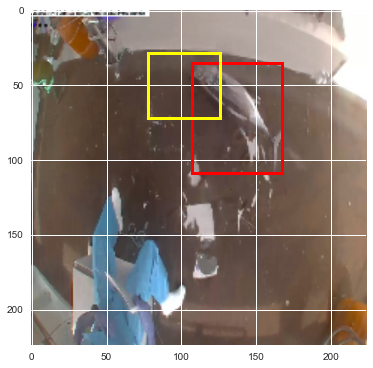

In [332]:
idx = 3059
i = idx-3000
name = id2file[idx]
bb = bb_v(name)
print(bb)
plt.figure(figsize=(6,6))
plt.imshow(X[idx])
plt.gca().add_patch(plt.Rectangle((bb[2], bb[3]), bb[1], bb[0], color='red', fill=False, lw=3))
bb = test_preds[0][i]
plt.gca().add_patch(plt.Rectangle((bb[2], bb[3]), bb[1], bb[0], color='yellow', fill=False, lw=3))

In [314]:
def do_clip(arr, mx): return np.clip(arr, (1-mx)/7, mx)

In [315]:
test_preds = do_clip(preds,0.82)

# test_preds=tp
# for pred in test_preds:
#     for i,p in enumerate(pred):
#         if(p>0.97):
#             pred[i]=0.97
# #         if(p<0.05):
# #             pred[i]=0.05

In [293]:
test_preds[0]

array([ 0.02571429,  0.02571429,  0.02571429,  0.02571429,  0.81999999,
        0.02571429,  0.02571429,  0.02571429], dtype=float32)

In [294]:
test_files = [im for im in os.listdir('./test')]
submission = pd.DataFrame(test_preds, columns=classes)
submission.insert(0, 'image', test_files)
submission.head()

,image,ALB,BET,DOL,LAG,NoF,OTHER,SHARK,YFT
0,img_00005.jpg,0.025714,0.025714,0.025714,0.025714,0.820000,0.025714,0.025714,0.025714
1,img_00007.jpg,0.820000,0.025714,0.025714,0.032280,0.025714,0.025714,0.025714,0.025714
2,img_00009.jpg,0.820000,0.025714,0.025714,0.025714,0.025714,0.025714,0.025714,0.025714
3,img_00018.jpg,0.820000,0.025714,0.025714,0.031742,0.025714,0.025714,0.025714,0.025714
4,img_00027.jpg,0.196965,0.074016,0.025714,0.033067,0.025714,0.302880,0.061709,0.315388


In [295]:
submission.to_csv('submit2.csv',index=False)

In [449]:
#model.fit(conv_train_f, y_train, batch_size=64, nb_epoch=20, verbose=1, shuffle=True,validation_data=(conv_test_f,y_test))
#model.fit()